In [110]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
from datetime import datetime
from functools import reduce
import math

# Gather Data

In [111]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [112]:
df_1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [113]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [114]:
df_2= pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
df_2.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [115]:
with open('tweet-json.txt') as f:
        data =  f.readlines()

In [116]:
df_list = []
for i in data:
    json_data = json.loads( i )
    tweet_id = int(json_data['id'])
    favorite_count = int ( json_data['favorite_count'] )
    retweet_count =  int ( json_data['retweet_count'] )
    df_list.append({'tweet_id': tweet_id ,
                    'favorite_count': favorite_count,
                    'retweet_count': retweet_count})
        
df_3= pd.DataFrame(df_list, columns = ['tweet_id' , 'favorite_count', 'retweet_count'])

In [9]:
json_data


{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 340, 'h': 255, 'resize': 'fit'},
     'medium': {'w': 600, 'h': 450, 'resize': 'fit

In [10]:
df_3.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

# Assessing Data
1_visual assessment :through google sheet to make sense about interesting issuee 

2_programatic assessment

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_2.sample(10)

tweet_id                                          jpg_url  \
1156  733460102733135873  https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg   
1854  841077006473256960  https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg   
1743  822859134160621569  https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg   
419   674038233588723717  https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg   
169   668989615043424256  https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg   
1030  711306686208872448  https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg   
987   707741517457260545  https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg   
42    666739327293083650  https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
997   708356463048204288  https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg   
1916  854482394044301312  https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg   

      img_num                  p1   p1_conf  p1_dog                  p2  \
1156        1                chow  0.931275    True              beaver   
1854        1    Brittany_spaniel  0.962985    True    Blenheim_spaniel   
1743        1            malinois  0.332897    True           Chihuahua   
419         1          Eskimo_dog  0.358459    True  Norwegian_elkhound   
169         1                 pug  0.917326    True         waffle_iron   
1030        1  leatherback_turtle  0.280835   False          loggerhead   
987         1             whippet  0.738371    True   Italian_greyhound   
42          1    miniature_poodle  0.546933    True      cocker_spaniel   
997         2                 pug  0.871283    True      French_bulldog   
1916        1           Chihuahua  0.260242    True          toy_poodle   

       p2_conf  p2_dog                              p3   p3_conf  p3_dog  
1156  0.028831   False                           dhole  0.017379   False  
1854  0.014820    True                         clumber  0.009557    True  
1743  0.104116    True       Staffordshire_bullterrier  0.047745    True  
419   0.206963    True                        malamute  0.148236    True  
169   0.014918   False                       Chihuahua  0.013524    True  
1030  0.123290   False                  Dandie_Dinmont  0.086792    True  
987   0.191789    True  American_Staffordshire_terrier  0.020126    True  
42    0.165255    True                      toy_poodle  0.095959    True  
997   0.041820    True                      bath_towel  0.015228   False  
1916  0.189158    True              Labrador_retriever  0.144195    True

In [13]:
df_3.sample(10)

tweet_id  favorite_count  retweet_count
1059  741303864243200000            9631           3650
474   816062466425819140               0           1207
994   748337862848962560            8462           4701
369   828409743546925057            6898           1305
712   784183165795655680           22513           9374
1727  679862121895714818            2678            706
114   870374049280663552           85011          27680
611   796904159865868288               0          10411
689   787397959788929025           12120           3300
731   781524693396357120           23163           6426

In [14]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# Sort by rating_numerator values
df_1.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [16]:
# Sort by rating_denominator values
df_1.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

# Quality


- wrong data types (ex:tweet_id,timestamp)

- missing some expanded_urls(url+tweet_id)

- there is unnecessery columns(in_reply_to_status_id','in_reply_to_user_id,retweeted_status_id)

- some names is not actual name

- unnecessary html tags in source column 

- p1, p2, p3 inconsistent capitalization

- inaccurate rating numenator

- inaccurate rating  denomonitor

# tideness

.doggo, floofer, pupper and puppo columns in df_1 table should be merged into one column named "stage"

.merge all 3 files


# Cleaning Data

In [117]:
# Make copies of dataframes to clean 
df_cln_1 = df_1.copy()
df_clean_2 = df_2.copy()
df_clean_3 = df_3.copy()

# wrong data types
tweet_id ,timestamp  other  wrong data types will be dropped  

In [118]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [119]:
# convert to object
df_cln_1['tweet_id'] = df_cln_1['tweet_id'].astype('str')

In [120]:
# test
df_cln_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# timestamp' type


In [121]:
# Remove the time zone 
df_cln_1['timestamp'] = df_cln_1['timestamp'].str.slice(start=0, stop=-6)

In [122]:
# Change to a datetime object
df_cln_1['timestamp'] = pd.to_datetime(df_cln_1['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [123]:
# test
df_cln_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [124]:
df_cln_1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

# missing some expanded_urls

In [69]:
df_cln_1[df_cln_1['expanded_urls'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [125]:
# import teet_id to fill null expanded_urls
def e_url(row):
    
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        tweet_id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row


# Save dataframe with missing urls
df_cln_1 = df_cln_1.apply(e_url, axis=1)

In [71]:
df_cln_1[df_cln_1['expanded_urls'].isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

# remove unnecessery columns

In [72]:
df_cln_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2356 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [126]:
# drop retweeted columns
df_cln_1 = df_cln_1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [127]:
# drop reply columns
df_cln_1 = df_cln_1.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

In [128]:
df_cln_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2356 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   object        
 8   doggo               2356 non-null   object        
 9   floofer             2356 non-null   object        
 10  pupper              2356 non-null   object        
 11  puppo               2356 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 138.1+ KB


# p1, p2, p3 inconsistent capitalization¶

In [129]:
df_clean_2['p1'] = df_clean_2['p1'].str.lower()
df_clean_2['p2'] = df_clean_2['p2'].str.lower()
df_clean_2['p3'] = df_clean_2['p3'].str.lower()

In [130]:
df_clean_2['p1']

0       welsh_springer_spaniel
1                      redbone
2              german_shepherd
3          rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

# inaccurate rating dominator

In [131]:
#check rating > 10
df_cln_1.query('rating_denominator > 10').index

Int64Index([ 342,  433,  784,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274,
            1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],
           dtype='int64')

In [132]:
#check rating < 10
df_cln_1.query('rating_denominator < 10').index

Int64Index([313, 516, 2335], dtype='int64')

In [133]:
# make all denominator =10
df_cln_1.rating_denominator = 10

In [134]:
# test
df_cln_1.query('rating_denominator == 10')

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
...                  ...                 ...   
2351  666049248165822465 2015-11-16 00:24:50   
2352  666044226329800704 2015-11-16 00:04:52   
2353  666033412701032449 2015-11-15 23:21:54   
2354  666029285002620928 2015-11-15 23:05:30   
2355  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  
0                     10   Phineas  None    None   None  None  
1                     10     Tilly  None    None   None  None  
2                     10    Archie  None    None   None  None  
3                     10     Darla  None    None   None  None  
4                     10  Franklin  None    None   None  None  
...                  ...       ...   ...     ...    ...   ...  
2351                  10      None  None    None   None  None  
2352                  10         a  None    None   None  None  
2353                  10         a  None    None   None  None  
2354                  10         a  None    None   None  None  
2355                  10      None  None    None   None  None  

[2356 rows x 12 columns]

# inaccurate rating numerator

make maximum rate :14 

check rate above 14

check full text in google sheet and correct some rating






In [64]:
df_cln_1[(df_cln_1.rating_numerator <= 10) | (df_cln_1.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [96]:
df_cln_1.rating_numerator.count()

2356

In [84]:
df_cln_1.query('rating_numerator < 10').index

Int64Index([  45,  229,  315,  387,  462,  485,  599,  605,  730,  745,
            ...
            2342, 2344, 2346, 2347, 2349, 2351, 2352, 2353, 2354, 2355],
           dtype='int64', length=440)

In [85]:
#df_clean_1[(df_clean_1.rating_numerator < 10)] =+ 13 #(mean)

In [83]:
df_cln_1[(df_cln_1.rating_numerator <= 10)].rating_numerator.value_counts().sort_index()

0       2
1       9
2       9
3      19
4      17
5      37
6      32
7      55
8     102
9     158
10    461
Name: rating_numerator, dtype: int64

In [135]:
#check full text in google sheet and correct some rating
df_cln_1['rating_numerator'] = df_cln_1['rating_numerator'].replace([960,165,121,144,17,75,27,1776,204,50,90,80,45,60,44,143,20,26,88],[13,11,11,12,13,10,12,11,1776,12,11,11,9,12,11,11,13,12,11])
        #13 (in the text)
        #11 (165/150 so,the quotient used to *10 
        #11 (204/170)
        #11 (121/110)
        #12 (144/120)

In [85]:
df_cln_1[(df_cln_1.rating_numerator > 100)].rating_numerator.value_counts().sort_index()

182     1
420     2
666     1
1776    1
Name: rating_numerator, dtype: int64

# One column for dog stages

In [136]:
#extract dog stage from text
df_cln_1['dog_stage'] = df_cln_1['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [137]:
#check for compatibility between etracted and dog stages column 
df_cln_1[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']]

dog_stage doggo floofer pupper puppo
0          NaN  None    None   None  None
1          NaN  None    None   None  None
2          NaN  None    None   None  None
3          NaN  None    None   None  None
4          NaN  None    None   None  None
...        ...   ...     ...    ...   ...
2351       NaN  None    None   None  None
2352       NaN  None    None   None  None
2353       NaN  None    None   None  None
2354       NaN  None    None   None  None
2355       NaN  None    None   None  None

[2356 rows x 5 columns]

In [138]:
#test
df_cln_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2356 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   object        
 8   doggo               2356 non-null   object        
 9   floofer             2356 non-null   object        
 10  pupper              2356 non-null   object        
 11  puppo               2356 non-null   object        
 12  dog_stage           399 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(10)
memor

In [92]:
df_cln_1

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
...                  ...                 ...   
2351  666049248165822465 2015-11-16 00:24:50   
2352  666044226329800704 2015-11-16 00:04:52   
2353  666033412701032449 2015-11-15 23:21:54   
2354  666029285002620928 2015-11-15 23:05:30   
2355  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo dog_stage  
0                     10   Phineas  None    None   None  None       NaN  
1                     10     Tilly  None    None   None  None       NaN  
2                     10    Archie  None    None   None  None       NaN  
3                     10     Darla  None    None   None  None       NaN  
4                     10  Franklin  None    None   None  None       NaN  
...                  ...       ...   ...     ...    ...   ...       ...  
2351                  10      None  None    None   None  None       NaN  
2352                  10         a  None    None   None  None       NaN  
2353                  10         a  None    None   None  None       NaN  
2354                  10         a  None    None   None  None       NaN  
2355                  10      None  None    None   None  None       NaN  

[2356 rows x 13 columns]

In [139]:
#drop dog statges
df_cln_1 = df_cln_1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [94]:
df_cln_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2356 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   object        
 8   dog_stage           399 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 110.5+ KB


# Merge all dataframes

In [140]:
d = pd.concat([df_cln_1,df_clean_3 ])

In [141]:
dfs = pd.concat([d,df_clean_2 ])


In [142]:
dfs.head(30)


tweet_id           timestamp  \
0   892420643555336193 2017-08-01 16:23:56   
1   892177421306343426 2017-08-01 00:17:27   
2   891815181378084864 2017-07-31 00:18:03   
3   891689557279858688 2017-07-30 15:58:51   
4   891327558926688256 2017-07-29 16:00:24   
5   891087950875897856 2017-07-29 00:08:17   
6   890971913173991426 2017-07-28 16:27:12   
7   890729181411237888 2017-07-28 00:22:40   
8   890609185150312448 2017-07-27 16:25:51   
9   890240255349198849 2017-07-26 15:59:51   
10  890006608113172480 2017-07-26 00:31:25   
11  889880896479866881 2017-07-25 16:11:53   
12  889665388333682689 2017-07-25 01:55:32   
13  889638837579907072 2017-07-25 00:10:02   
14  889531135344209921 2017-07-24 17:02:04   
15  889278841981685760 2017-07-24 00:19:32   
16  888917238123831296 2017-07-23 00:22:39   
17  888804989199671297 2017-07-22 16:56:37   
18  888554962724278272 2017-07-22 00:23:06   
19  888202515573088257 2017-07-21 01:02:36   
20  888078434458587136 2017-07-20 16:49:33   
21  887705289381826560 2017-07-19 16:06:48   
22  887517139158093824 2017-07-19 03:39:09   
23  887473957103951883 2017-07-19 00:47:34   
24  887343217045368832 2017-07-18 16:08:03   
25  887101392804085760 2017-07-18 00:07:08   
26  886983233522544640 2017-07-17 16:17:36   
27  886736880519319552 2017-07-16 23:58:41   
28  886680336477933568 2017-07-16 20:14:00   
29  886366144734445568 2017-07-15 23:25:31   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   
20  <a href="http://twitter.com/download/iphone" r...   
21  <a href="http://twitter.com/download/iphone" r...   
22  <a href="http://twitter.com/download/iphone" r...   
23  <a href="http://twitter.com/download/iphone" r...   
24  <a href="http://twitter.com/download/iphone" r...   
25  <a href="http://twitter.com/download/iphone" r...   
26  <a href="http://twitter.com/download/iphone" r...   
27  <a href="http://twitter.com/download/iphone" r...   
28  <a href="http://twitter.com/download/iphone" r...   
29  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
0   This is Phineas. He's a mystical boy. Only eve...   
1   This is Tilly. She's just checking pup on you....   
2   This is Archie. He is a rare Norwegian Pouncin...   
3   This is Darla. She commenced a snooze mid meal...   
4   This is Franklin. He would like you to stop ca...   
5   Here we have a majestic great white breaching ...   
6   Meet Jax. He enjoys ice cream so much he gets ...   
7   When you watch your owner call another dog a g...   
8   This is Zoey. She doesn't want to be one of th...   
9   This is Cassie. She is a college pup. Studying...   
10  This is Koda. He is a South Australian decksha...   
11  This is Bruno. He is a service shark. Only get...   
12  Here's a puppo that seems to be on the fence a...   
13  This is Ted. He d

# Storing Dataframe

In [1]:
# Save  dataframe to a CSV file
dfs.to_csv('twitter_archive_master.csv')

NameError: name 'dfs' is not defined

# Anayze and Visualize

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


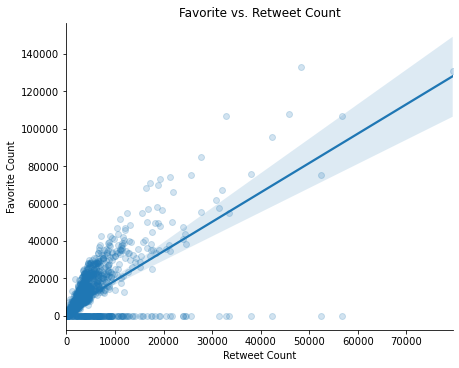

In [104]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=dfs,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

# unnecessary html tags in source column

In [91]:
dfs['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
#extract souerce from source columns 
dfs['source_1'] = dfs['source'].str.extract('(Twitter for iPhone|Twitter Web Client|TweetDeck|Vine - Make a Scene)')

In [30]:
dfs['source_1'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source_1, dtype: int64

In [33]:
dfs = dfs.drop(['source'],axis=1)

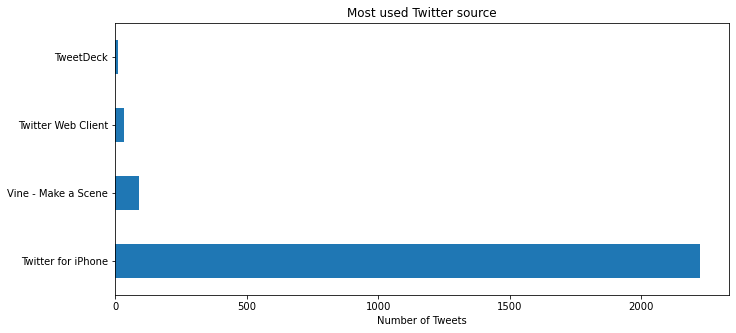

In [40]:
dfs['source_1'].value_counts().plot(kind ='barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

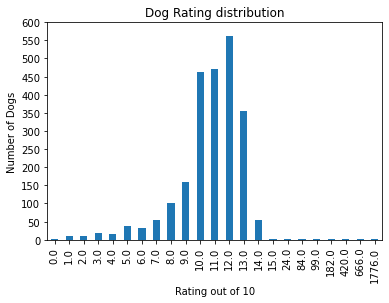

In [94]:
ax = dfs.rating_numerator.value_counts().sort_index().plot(kind='bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450,500,550,600])
plt.savefig('rating_dist')